# Grover's Algorithm with Noise
### Following tutorial on https://qiskit.org/textbook/ch-algorithms/grover.html


In [1]:
!pip3 install qiskit

In [2]:
!pip3 install qutip

  Using cached qutip-4.5.0.tar.gz (3.5 MB)
  Created wheel for qutip: filename=qutip-4.5.0-cp37-cp37m-macosx_10_9_x86_64.whl size=6090873 sha256=6430c0770467be37283d8af343117eee54cfd59fbadf268956f073e7f971ad33
  Stored in directory: /Users/chanc/Library/Caches/pip/wheels/76/3d/fa/295b89506b409b300f65c1f2d6730918a69dffbae647b7f3cd
Successfully built qutip


In [23]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.monitor import job_monitor

# import basic plot tools
from qiskit.visualization import plot_histogram

# import qutip
from qutip import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice


In [4]:
# Test that the oracle flips the sign on |01> 
init = tensor(snot()*basis(2,0),snot()*basis(2,0))
psi1 = tensor(sigmax(),snot())*init
psi2 = cnot()*psi1
psi3 = tensor(sigmax(),snot())*psi2
print(init)
print(psi3)

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.5]
 [0.5]
 [0.5]
 [0.5]]
Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [-0.5]
 [ 0.5]
 [ 0.5]]


/Users/chanc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  
/Users/chanc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chanc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
f

### Grover Circuit for |11>

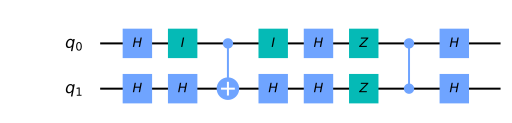

In [5]:
# Initialize quantum circuit with 2 bits
n = 2
grover_circuit = QuantumCircuit(n)

# Superposition
for qubit in range(n):
    grover_circuit.h(qubit)
    
# Oracle Uf (sign flip |11>)
grover_circuit.h(1)
grover_circuit.i(0)
grover_circuit.cnot(0,1)
grover_circuit.h(1)
grover_circuit.i(0)

# Reflection Us 
for qubit in range(n):
    grover_circuit.h(qubit)
for qubit in range(n):
    grover_circuit.z(qubit)
grover_circuit.cz(0,1)
for qubit in range(n):
    grover_circuit.h(qubit)

# draw circuit
grover_circuit.draw('mpl')


In [6]:
# Run Grover's
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, backend_sim)
final_state = job_sim.result().get_statevector()
print(final_state)

[7.85046229e-17+0.0000000e+00j 1.66533454e-16+1.8369702e-16j
 7.85046229e-17+1.8369702e-16j 1.00000000e+00-3.6739404e-16j]


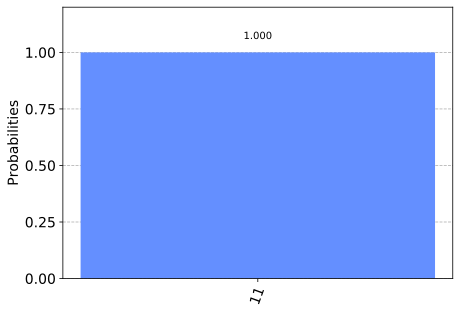

In [7]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [14]:
# Token for IBM hardware
token = "bbd0f2f47b810826c8a895ea94564360a36cc67b1d022f38ac0be107ed26f3130b8800657c1fa23ce843103e6ffaed866e807087a3eade8c13f4d847a97923e5"
IBMQ.save_account(token, overwrite=True)

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = provider.get_backend('ibmq_16_melbourne')

In [16]:
# Running circuit on IBM hardware

job = execute(grover_circuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


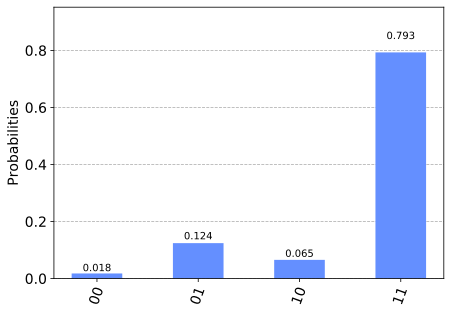

In [17]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

### Grover Circuit for |01>

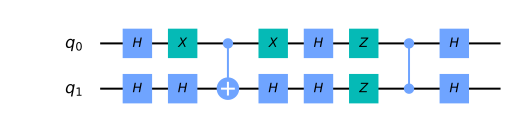

In [18]:
# Initialize quantum circuit with 2 bits
n = 2
grover_circuit = QuantumCircuit(n)

# Superposition
for qubit in range(n):
    grover_circuit.h(qubit)
    
# Oracle Uf (flips sign of |01>) 
# Note: The order of the tensor product in QuantumCircuit is [a00, a10, a01, a11], where the first number is
# the least significant qubit. This is different from qutip, which is ordered [a00, a01, a10, a11]
grover_circuit.h(1)
grover_circuit.x(0)
grover_circuit.cnot(0,1)
grover_circuit.h(1)
grover_circuit.x(0)

# Reflection Us 
for qubit in range(n):
    grover_circuit.h(qubit)
for qubit in range(n):
    grover_circuit.z(qubit)
grover_circuit.cz(0,1)
for qubit in range(n):
    grover_circuit.h(qubit)

# draw circuit
grover_circuit.draw('mpl')

In [19]:
# Run Grover's
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, backend_sim)
final_state = job_sim.result().get_statevector()
print(final_state)

[ 1.11022302e-16+6.12323400e-17j -3.92523115e-17+4.93038066e-32j
  1.00000000e+00-3.67394040e-16j -3.92523115e-17+1.83697020e-16j]


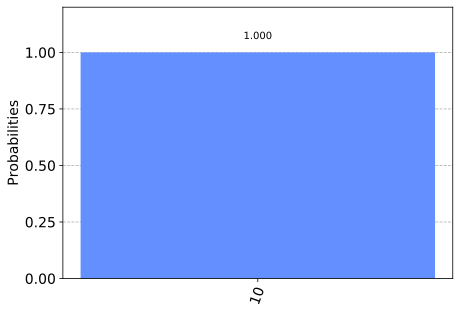

In [20]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [21]:
# Running circuit on IBM hardware

job = execute(grover_circuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


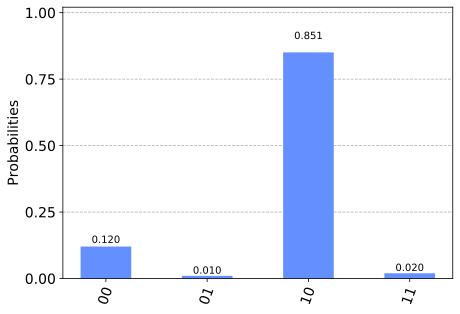

In [22]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)